# Loan Default Prediction


In [2]:
import pandas as pd #import our dataset and manipulation
import numpy as np # array or list manipulation
import matplotlib.pyplot as plt#creating visuals
import seaborn as sns# visuals
import warnings#remove warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler#(x - mean)/standard deviation
from sklearn.model_selection import train_test_split#split dataset

from sklearn.linear_model import LogisticRegression#import the algorithm
data = pd.read_csv('Default_Fin.csv')#import dataset

In [3]:
#Let's see what we have in the data
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
data['Defaulted?'].value_counts()#0=not defaulted 1=defaulted

0    9667
1     333
Name: Defaulted?, dtype: int64

In [5]:
data.shape

(10000, 5)

In [6]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [7]:
#we don't need the index loaded with the csv
data.drop('Index',axis=1,inplace=True)
data.head(2)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0


In [8]:
print('max amount ',data['Bank Balance'].max())
print('min amount ',data['Bank Balance'].min())

max amount  31851.84
min amount  0.0


In [9]:
data.isna().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

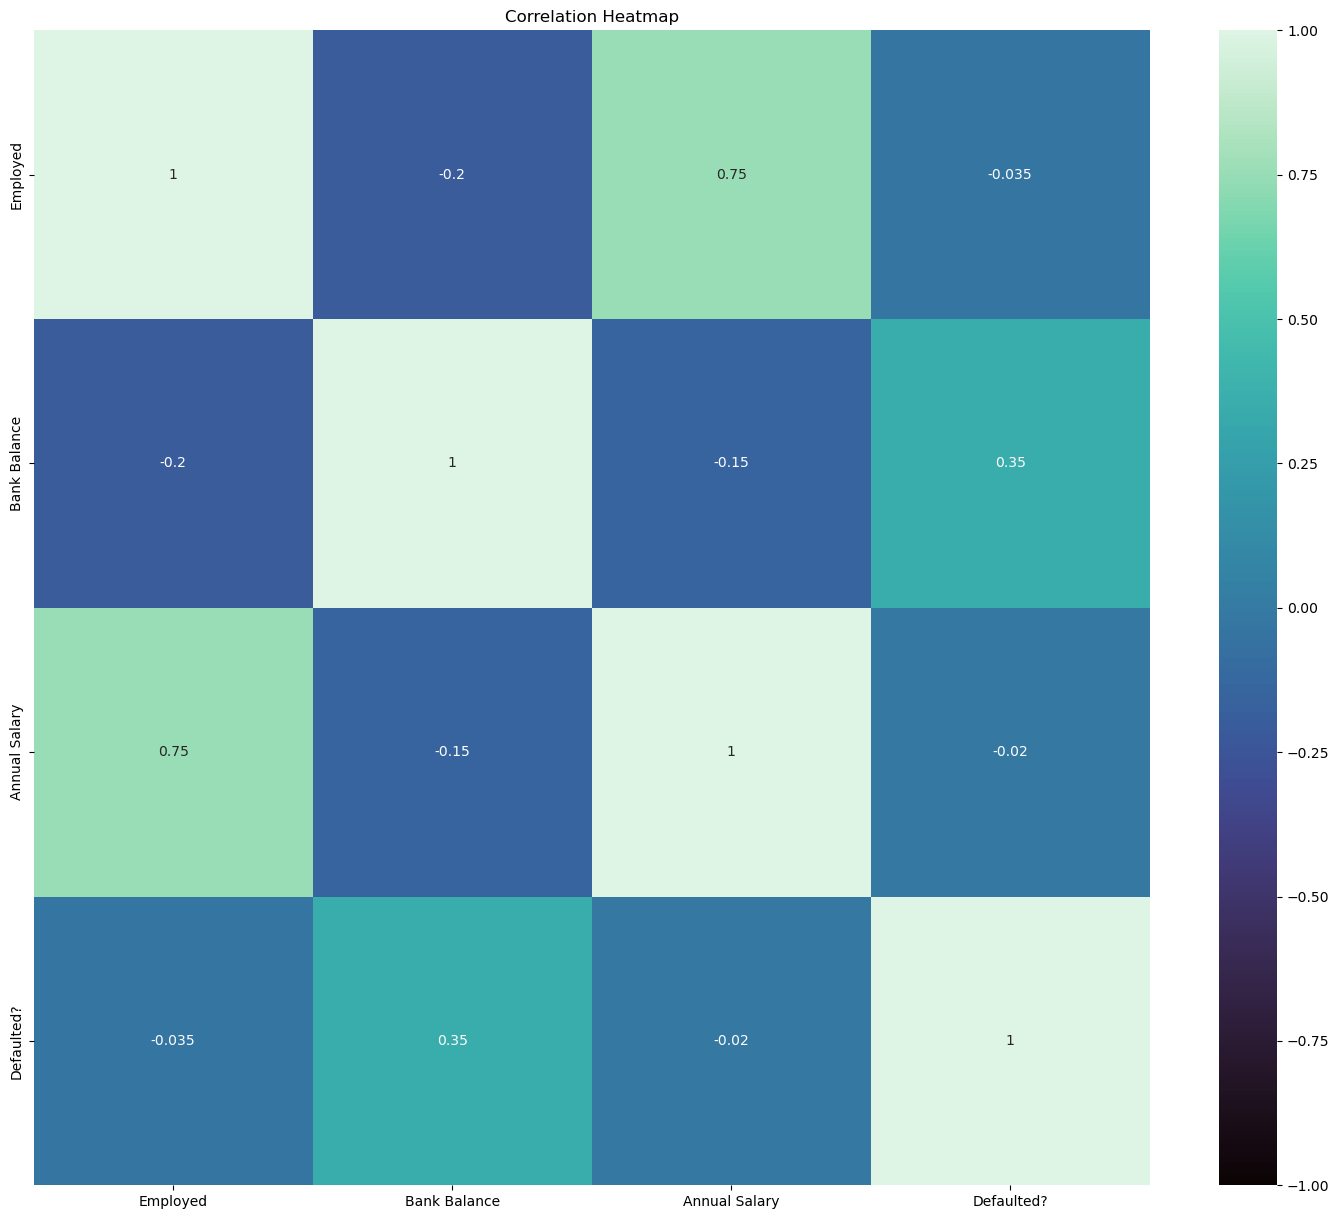

In [10]:
corr = data.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
X=data[['Employed', 'Bank Balance', 'Annual Salary']]#idenpendent variables
y=data['Defaulted?']#depedent variables

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)#test set is 20%

In [13]:
X_train

,Employed,Bank Balance,Annual Salary
2694,1,21648.48,375819.60
5140,1,14090.28,426401.76
2568,1,11743.80,308905.44
3671,0,6577.68,234016.08
7427,1,3240.84,442003.80
...,...,...,...
2895,0,15241.08,201708.12
7813,1,19176.24,469960.32
905,1,14813.76,375760.44
5192,1,0.00,351871.56


#### Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split#spliting the dataset
from sklearn.tree import DecisionTreeClassifier#Decision tree algorithm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#metrics

In [ ]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('recall: %.2f' % recall)
print('f1: %.2f' % f1)

#### 
Positive= Defaulted = 1<br>
Negative= Not Defaulted = 0<br>

tp= Predicted positive and it is true that is predicted defaulted and it actually defaulted <br>

fp= Predicted positive but it is actually negative that is predicted defaulted but it is actually not defualted <br>

tn= Predicted negative and it is actually negative    that is predicted not defaulted and did not default <br>

fn= Predicted negative and but is actually positive that is predicted not defaulted but the customer actually defaulted <br>



Accuracy=tp+tn/tp+tn+fp+fn <br>
precision=tp/tpfp <br>
recall=tp/tp+fn <br>
f1score=2(precision * Recall)/(precison+Recall)


In [ ]:
#0 is negative (not default) and 1 is positive (default)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
20/(20+62)#tp=20,tn=1876,fp=65,fn=39 0 is negative (not default) and 1 is positive (default)

In [ ]:
20/(20+39)#tp/tp+fn recall

In [ ]:
1879+62+39+20 

In [ ]:
(1879+20)/2000

In [ ]:
#list(y_test)
y_pred

In [ ]:
result=0
for i in range(len(y_test)):
    if list(y_test)[i] == y_pred[i] == 1:
        result += 1

print(result) # 2

#### Logistic regression

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [ ]:
#calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

#print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1score)

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    log_reg = LogisticRegression()

# Fit the model to the training data
    log_reg.fit(X_train, y_train)
    
    y_pred = log_reg.predict(X_test)
    #print(precision_score(y_test, y_pred),i)
    scores.append(precision_score(y_test, y_pred))

In [ ]:
np.argmax(scores)

In [ ]:
scores[np.argmax(scores)]

In [ ]:
X_train

In [ ]:
#data scaling steps for train data set
from sklearn.preprocessing import StandardScaler#(x - mean)/standard deviation
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [ ]:
#X_train.Employed.unique()

In [ ]:
X_train['Bank Balance'].min()

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=783)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [ ]:
#calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

#print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1score)